# Regression Movie Data on Revenue

In [1]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#uploading cleaned data

In [3]:
revdf = pd.read_csv('quality3.csv')

In [4]:
revdf

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,genre1,Directors,actor_count,Prodcountries,Prodcompanies,release_year,profit,Quality
0,237000000,7,150.437577,2787965087,162.0,1,7.2,11800,0,876,83,68,640,2009,2550965087,1
1,300000000,7,139.082615,961000000,169.0,1,6.9,4500,1,760,34,67,1380,2007,661000000,1
2,245000000,7,107.376788,880674609,148.0,1,6.3,4466,0,1949,83,68,394,2015,635674609,0
3,250000000,7,112.312950,1084939099,165.0,1,7.6,9106,0,355,158,67,771,2012,834939099,1
4,260000000,7,43.926995,284139100,132.0,1,6.1,2124,0,93,27,68,1446,2012,24139100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,1000000,7,23.307949,424760,77.0,1,6.9,658,15,1995,19,68,936,2004,-575240,1
4735,1000000,8,14.269792,2040920,81.0,1,6.6,238,0,1875,7,68,268,1992,1040920,1
4736,1000000,7,0.642552,0,85.0,1,5.9,58,3,597,5,10,171,2011,-1000000,0
4737,1000000,7,1.444476,0,120.0,1,7.0,58,3,1973,7,67,1272,2013,-1000000,1


In [5]:
revdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4739 entries, 0 to 4738
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4739 non-null   int64  
 1   original_language  4739 non-null   int64  
 2   popularity         4739 non-null   float64
 3   revenue            4739 non-null   int64  
 4   runtime            4739 non-null   float64
 5   status             4739 non-null   int64  
 6   vote_average       4739 non-null   float64
 7   vote_count         4739 non-null   int64  
 8   genre1             4739 non-null   int64  
 9   Directors          4739 non-null   int64  
 10  actor_count        4739 non-null   int64  
 11  Prodcountries      4739 non-null   int64  
 12  Prodcompanies      4739 non-null   int64  
 13  release_year       4739 non-null   int64  
 14  profit             4739 non-null   int64  
 15  Quality            4739 non-null   int64  
dtypes: float64(3), int64(13)

In [6]:
revdf.isnull().sum()

budget               0
original_language    0
popularity           0
revenue              0
runtime              0
status               0
vote_average         0
vote_count           0
genre1               0
Directors            0
actor_count          0
Prodcountries        0
Prodcompanies        0
release_year         0
profit               0
Quality              0
dtype: int64

In [10]:
revdf.duplicated().sum()

0

In [11]:
revdf.head(5)

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,genre1,Directors,actor_count,Prodcountries,Prodcompanies,release_year,profit,Quality
0,237000000,7,150.437577,2787965087,162.0,1,7.2,11800,0,876,83,68,640,2009,2550965087,1
1,300000000,7,139.082615,961000000,169.0,1,6.9,4500,1,760,34,67,1380,2007,661000000,1
2,245000000,7,107.376788,880674609,148.0,1,6.3,4466,0,1949,83,68,394,2015,635674609,0
3,250000000,7,112.312950,1084939099,165.0,1,7.6,9106,0,355,158,67,771,2012,834939099,1
4,260000000,7,43.926995,284139100,132.0,1,6.1,2124,0,93,27,68,1446,2012,24139100,0


In [12]:
#statistical description
revdf.describe()

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,genre1,Directors,actor_count,Prodcountries,Prodcompanies,release_year,profit,Quality
count,4.739000e+03,4739.000000,4739.000000,4.739000e+03,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4.739000e+03,4739.000000
mean,2.966596e+07,7.489555,21.779109,8.336349e+07,107.410795,0.999789,6.337096,708.412956,5.285081,1195.120068,22.392910,54.820215,836.725892,2002.388901,5.369754e+07,0.448829
std,4.069234e+07,3.119954,31.934249,1.636740e+08,21.743959,0.032485,0.680863,1235.483429,4.669487,676.088242,19.569978,22.140543,457.197690,12.454698,1.368272e+08,0.497427
min,1.000000e+06,0.000000,0.000372,0.000000e+00,0.000000,0.000000,5.600000,58.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1916.000000,-1.657101e+08,0.000000
25%,1.000000e+06,7.000000,4.978426,0.000000e+00,94.000000,1.000000,5.600000,58.000000,2.000000,608.000000,12.000000,40.000000,394.000000,1999.000000,-1.000000e+06,0.000000
50%,1.500000e+07,7.000000,13.291991,1.992403e+07,104.000000,1.000000,6.200000,242.000000,4.000000,1208.000000,17.000000,68.000000,876.000000,2005.000000,2.928871e+06,0.000000
75%,4.000000e+07,7.000000,28.670335,9.437631e+07,118.000000,1.000000,6.800000,750.500000,6.000000,1805.000000,25.000000,68.000000,1286.000000,2011.000000,5.658220e+07,1.000000
max,3.800000e+08,36.000000,875.581305,2.787965e+09,338.000000,2.000000,10.000000,13752.000000,19.000000,2319.000000,224.000000,68.000000,1513.000000,2017.000000,2.550965e+09,1.000000


In [13]:
# as category type

In [14]:
# object as category
cat_col = ['Quality','original_language','genre1','Directors','Prodcompanies','Prodcountries']
revdf[cat_col] = revdf[cat_col].astype('category')

In [15]:
revdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4739 entries, 0 to 4738
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   budget             4739 non-null   int64   
 1   original_language  4739 non-null   category
 2   popularity         4739 non-null   float64 
 3   revenue            4739 non-null   int64   
 4   runtime            4739 non-null   float64 
 5   status             4739 non-null   int64   
 6   vote_average       4739 non-null   float64 
 7   vote_count         4739 non-null   int64   
 8   genre1             4739 non-null   category
 9   Directors          4739 non-null   category
 10  actor_count        4739 non-null   int64   
 11  Prodcountries      4739 non-null   category
 12  Prodcompanies      4739 non-null   category
 13  release_year       4739 non-null   int64   
 14  profit             4739 non-null   int64   
 15  Quality            4739 non-null   category
dtypes: cat

In [16]:
# label encoding 

In [17]:
from sklearn import preprocessing

In [18]:
label_encoder =preprocessing.LabelEncoder()

for col in cat_col:
    revdf[col] = label_encoder.fit_transform(revdf[col])

In [19]:
revdf

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,genre1,Directors,actor_count,Prodcountries,Prodcompanies,release_year,profit,Quality
0,237000000,7,150.437577,2787965087,162.0,1,7.2,11800,0,876,83,68,640,2009,2550965087,1
1,300000000,7,139.082615,961000000,169.0,1,6.9,4500,1,760,34,67,1380,2007,661000000,1
2,245000000,7,107.376788,880674609,148.0,1,6.3,4466,0,1949,83,68,394,2015,635674609,0
3,250000000,7,112.312950,1084939099,165.0,1,7.6,9106,0,355,158,67,771,2012,834939099,1
4,260000000,7,43.926995,284139100,132.0,1,6.1,2124,0,93,27,68,1446,2012,24139100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,1000000,7,23.307949,424760,77.0,1,6.9,658,15,1995,19,68,936,2004,-575240,1
4735,1000000,8,14.269792,2040920,81.0,1,6.6,238,0,1875,7,68,268,1992,1040920,1
4736,1000000,7,0.642552,0,85.0,1,5.9,58,3,597,5,10,171,2011,-1000000,0
4737,1000000,7,1.444476,0,120.0,1,7.0,58,3,1973,7,67,1272,2013,-1000000,1


In [20]:
corr_mat = revdf.corr()

<Axes: >

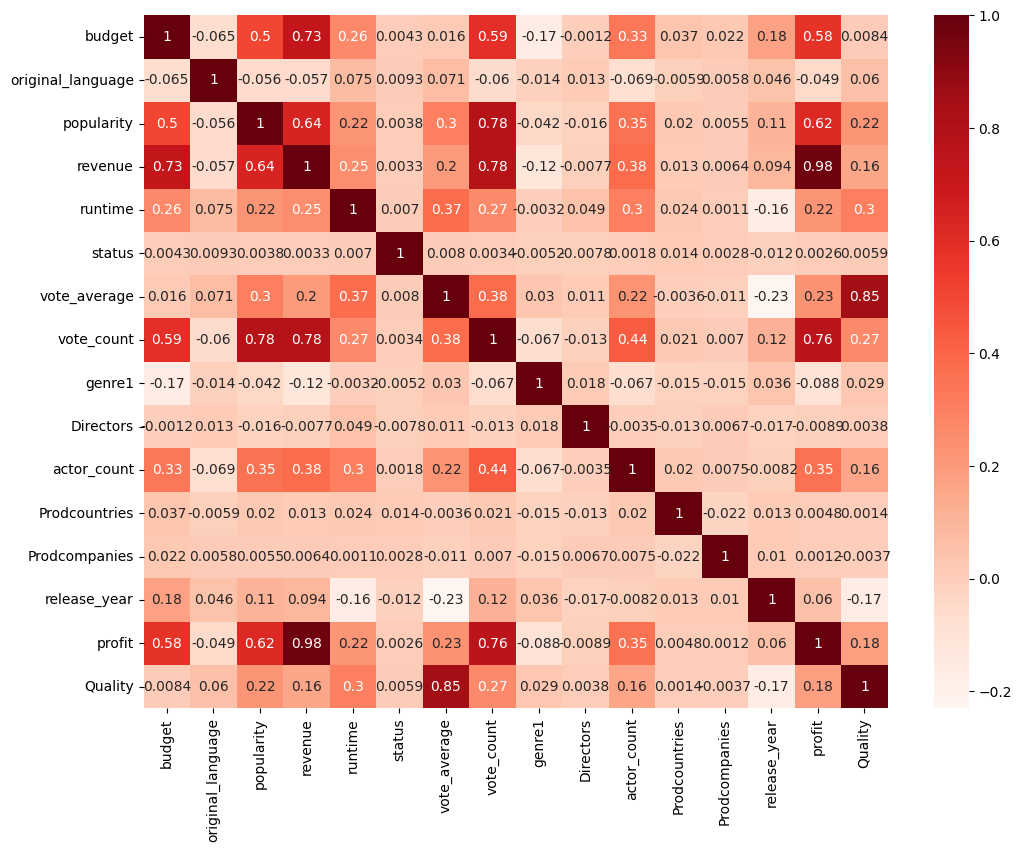

In [21]:
#heatmap correlation
plt.figure(figsize=(12,9))
sns.heatmap(corr_mat,annot=True,cmap='Reds')

In [22]:
# splitting and scaling

In [23]:
#splitting and scaling
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [24]:
X=revdf.drop(['revenue','profit'],axis=1)
y=revdf['revenue']

In [25]:
scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[ 5.09569871, -0.15692744,  4.02928042, ..., -0.43033168,
         0.53086769,  1.10816095],
       [ 6.64406487, -0.15692744,  3.67366973, ...,  1.18839497,
         0.37026878,  1.10816095],
       [ 5.29231664, -0.15692744,  2.68071786, ..., -0.96844892,
         1.01266443, -0.90239599],
       ...,
       [-0.70453009, -0.15692744, -0.6619472 , ..., -1.45625439,
         0.69146661, -0.90239599],
       [-0.70453009, -0.15692744, -0.63683283, ...,  0.95214838,
         0.85206552,  1.10816095],
       [-0.70453009, -0.15692744, -0.62163102, ...,  0.01809935,
         0.20966986, -0.90239599]])

In [26]:
# splitting

In [27]:
X_train, X_test,y_train, y_test=train_test_split(scaled_X,y,test_size=0.3,random_state=42)

In [28]:
X_train.shape

(3317, 14)

In [29]:
X_test.shape

(1422, 14)

# Linear Regression

In [30]:
#impoting libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [31]:
#linear model
lr_model = LinearRegression().fit(X_train,y_train)

In [32]:
y_pred = lr_model.predict(X_test)

In [33]:
#scores
print("rmse :", mean_squared_error(y_test,y_pred,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred))
print("mse :", mean_squared_error(y_test,y_pred))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred))
print("r2q: " , r2_score(y_test,y_pred))

rmse : 86613916.23344916
mae : 47400758.10730522
mse : 7501970485294948.0
MAP: 2.738114840907484e+22
r2q:  0.7252157593301123


In [34]:
a=lr_model.score(X_train,y_train)

In [35]:
b=lr_model.score(X_test,y_test)

In [36]:
len(X_test)

1422

In [37]:
len(y_pred)

1422

In [38]:
len(X_train)

3317

In [39]:
#adjusted r score
trainadscore= 1-(1-a)*(3317-1)/(3317-16-1)
testadscore= 1-(1-b)*(1422-1)/(1422-16-1)

In [40]:
print("adjusted r score for train :" , trainadscore )
print("adjusted r score for test :" , testadscore )

adjusted r score for train : 0.7244835757026029
adjusted r score for test : 0.7220865437779997


# Decision Tree

In [41]:
#libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
#kfold
kf=KFold(n_splits=5,random_state=42,shuffle=True)

In [45]:
dt=DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

In [46]:
param_grid={'min_samples_split':[3,5,7,9,10,40,80,100],
           'min_samples_leaf':[1,3,4,5,6,7,8,10,40,80,100],
           'max_depth':[3,4,5,6,7,8,9,10],
           'max_features':[2,3,4,5,6,7]}

In [47]:
#cross validation using k fold
gridcv=GridSearchCV(dt,param_grid,cv=kf,scoring='r2')

In [48]:
gridcv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 3, 4, 5, 6, 7, 8, 10, 40, 80,
                                              100],
                         'min_samples_split': [3, 5, 7, 9, 10, 40, 80, 100]},
             scoring='r2')

In [49]:
gridcv.best_score_

0.6511513226214112

In [50]:
gridcv.best_params_

{'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 40}

In [51]:
gridcv.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features=7, min_samples_leaf=4,
                      min_samples_split=40, random_state=42)

In [52]:
#model building
dt_model=DecisionTreeRegressor(max_depth=5, max_features=7, min_samples_leaf=4,
                      min_samples_split=40, random_state=42).fit(X_train,y_train)
y_pred2=dt_model.predict(X_test)

In [53]:
print('Score Training: ',dt_model.score(X_train,y_train))
print('Score Test: ',dt_model.score(X_test,y_test))

Score Training:  0.7241063138958904
Score Test:  0.6634886599434846


In [54]:
#scores
print("rmse :", mean_squared_error(y_test,y_pred2,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred2))
print("mse :", mean_squared_error(y_test,y_pred2))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred2))
print("r2q: " , r2_score(y_test,y_pred2))

rmse : 95849889.56175895
mae : 47795852.77938094
mse : 9187201329001388.0
MAP: 1.9322104572889715e+22
r2q:  0.6634886599434846


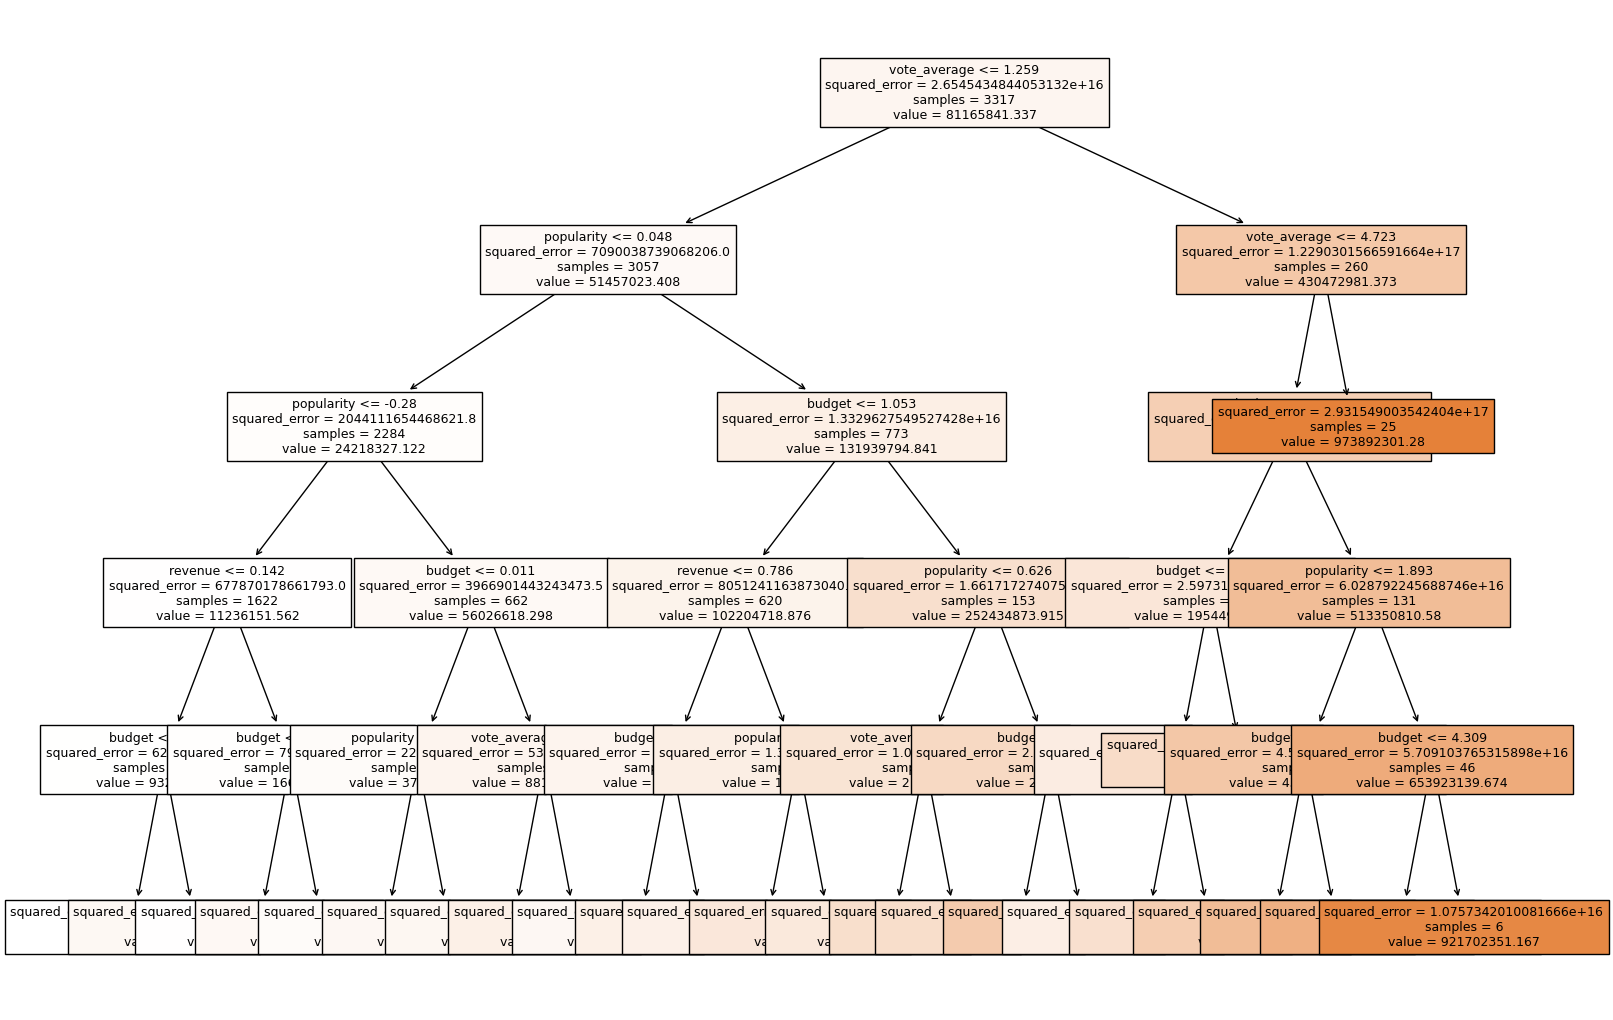

In [55]:
plt.figure(figsize=(18,13))
tree.plot_tree(dt_model,filled=True,feature_names=revdf.columns,fontsize=9)
plt.show()

# KNN 

In [56]:
#libraries
from sklearn.neighbors import KNeighborsRegressor

In [57]:
X.shape

(4739, 14)

In [58]:
#cross validation using kfold
score1=[]
for i in range(65,75):
    score=cross_val_score(KNeighborsRegressor(i),scaled_X,y,cv=kf,scoring='r2')
    print(f'{i} : ',np.mean(score))
    score1.append(np.mean(score))

65 :  0.6599935308406736
66 :  0.6599467332210749
67 :  0.6591724749372174
68 :  0.6582434020212171
69 :  0.6575924827219237
70 :  0.6564680364255786
71 :  0.6555090463402823
72 :  0.6547998874144231
73 :  0.6542004988827503
74 :  0.6533385023293288


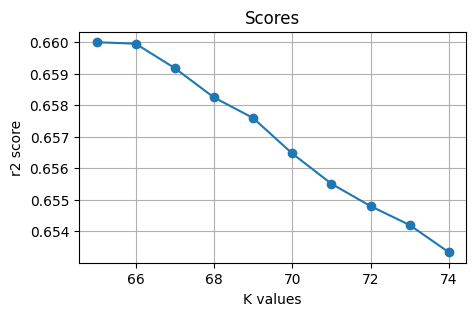

In [59]:
#scores plotting
plt.figure(figsize=(5,3))
plt.plot(range(65,75),score1,marker='o')
plt.xlabel('K values')
plt.ylabel('r2 score')
plt.title("Scores")
plt.grid()
plt.show()

In [60]:
#kMeans model
k=66
k_model = KNeighborsRegressor(k).fit(X_train,y_train)
y_predk = k_model.predict(X_test)

In [61]:
print("Training score:", k_model.score(X_train,y_train))

Training score: 0.6394214245747762


In [62]:
print("Testing score:", k_model.score(X_test,y_test))

Testing score: 0.64343269663399


In [63]:
#scores
print("rmse :", mean_squared_error(y_test,y_predk,squared=False))
print("mae :", mean_absolute_error(y_test,y_predk))
print("mse :", mean_squared_error(y_test,y_predk))
print("MAP:" , mean_absolute_percentage_error(y_test,y_predk))
print("r2q: " , r2_score(y_test,y_predk))

rmse : 98664864.34000789
mae : 51015417.51412863
mse : 9734755455232160.0
MAP: 2.8449097991380812e+22
r2q:  0.64343269663399


# Random Forest

In [64]:
#libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [65]:
rf=RandomForestRegressor()

In [66]:
param_grid={"n_estimators":[10,20,40,50,70,100], #base learner
            "min_samples_split":[10,20,30], #sample size
            "min_samples_leaf":[20,40,100],
            "max_depth":[3,4,5,6,7,8,9,10]
}

In [67]:
grid_cv = GridSearchCV(rf,param_grid,cv=kf,scoring="r2")

In [68]:
#model building using crossvalidation
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [10, 20, 40, 50, 70, 100]},
             scoring='r2')

In [69]:
grid_cv.best_score_

0.7081537627482127

In [70]:
grid_cv.best_params_

{'max_depth': 7,
 'min_samples_leaf': 20,
 'min_samples_split': 10,
 'n_estimators': 100}

In [71]:
grid_cv.best_estimator_

RandomForestRegressor(max_depth=7, min_samples_leaf=20, min_samples_split=10)

In [72]:
rm_model =RandomForestRegressor(max_depth=7, min_samples_leaf=20, min_samples_split=10).fit(X_train,y_train)

In [73]:
y_pred3= rm_model.predict(X_test)

In [74]:
#scores
print("rmse :", mean_squared_error(y_test,y_pred3,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred3))
print("mse :", mean_squared_error(y_test,y_pred3))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred3))
print("r2q: " , r2_score(y_test,y_pred3))

rmse : 78322291.98835306
mae : 40225956.85735545
mse : 6134381422308833.0
MAP: 1.311673252547274e+22
r2q:  0.7753081881070175


In [75]:
rm_model.score(X_test,y_test)

0.7753081881070175

In [76]:
rm_model.score(X_train,y_train)

0.7670650875261465

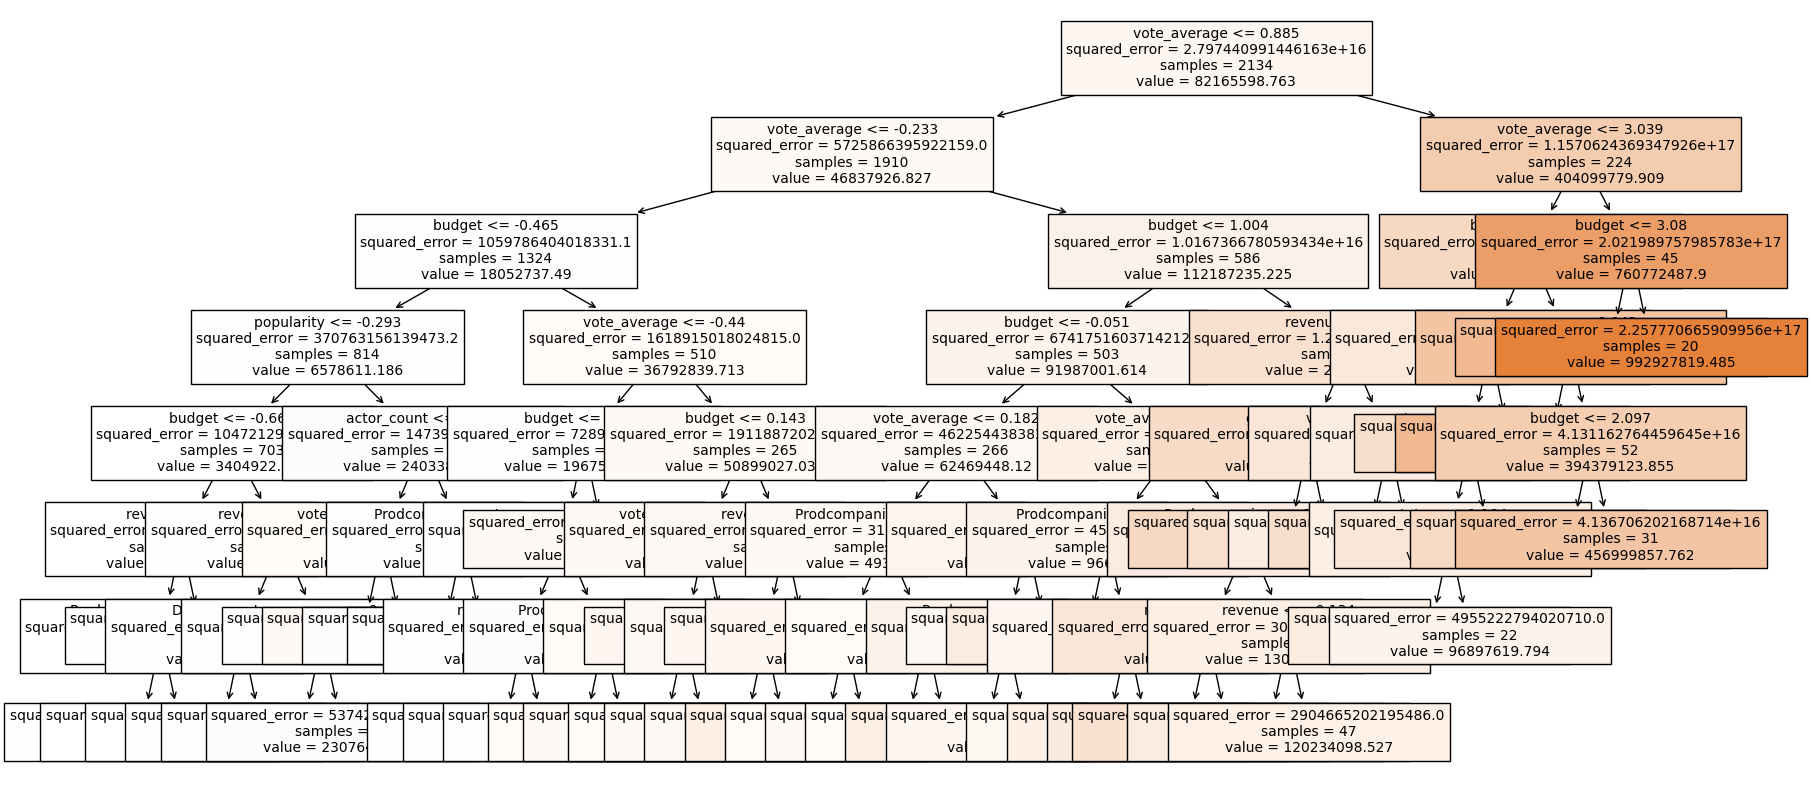

In [77]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(grid_cv.best_estimator_[0],feature_names=revdf.columns,class_names=True,filled=True,fontsize=10)
plt.show()

# Stacking

In [78]:
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [79]:
#stack model
level1=[]
level1.append(('lr',LinearRegression()))
level1.append(('KNN',KNeighborsRegressor()))
level1.append(('SVM',SVR()))
level1.append(('DT',DecisionTreeRegressor(max_depth=5, max_features=7, min_samples_leaf=4,
                      min_samples_split=40, random_state=42)))
level1.append(('RF',RandomForestRegressor(max_depth=7, min_samples_leaf=20, min_samples_split=10)))
level2=LinearRegression()
stac_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [80]:
level1

[('lr', LinearRegression()),
 ('KNN', KNeighborsRegressor()),
 ('SVM', SVR()),
 ('DT',
  DecisionTreeRegressor(max_depth=5, max_features=7, min_samples_leaf=4,
                        min_samples_split=40, random_state=42)),
 ('RF',
  RandomForestRegressor(max_depth=7, min_samples_leaf=20, min_samples_split=10))]

In [81]:
s_model=stac_model.fit(X_train,y_train)
y_pred6=s_model.predict(X_test)

In [82]:
print('Score Training: ',s_model.score(X_train,y_train))
print('Score Test: ',s_model.score(X_test,y_test))

Score Training:  0.787659556023866
Score Test:  0.7471877998942755


In [83]:
#scores
print("rmse :", mean_squared_error(y_test,y_pred6,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred6))
print("mse :", mean_squared_error(y_test,y_pred6))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred6))
print("r2q: " , r2_score(y_test,y_pred6))

rmse : 83078907.88122533
mae : 42857212.69231158
mse : 6902104934737124.0
MAP: 1.8096788237337831e+22
r2q:  0.7471877998942755


**Conclusion**

In [84]:
#comaparing
print("Linear Regg. r2_score: " ,  r2_score(y_test,y_pred))
print("Decision Tree Regg. r2_score: " ,  r2_score(y_test,y_pred2))
print("KNN. r2_score: " ,  r2_score(y_test,y_predk))
print("Random Forest Regg. r2_score: " ,  r2_score(y_test,y_pred3))
print("Stacking Regg. r2_score: " ,  r2_score(y_test,y_pred6))

Linear Regg. r2_score:  0.7252157593301123
Decision Tree Regg. r2_score:  0.6634886599434846
KNN. r2_score:  0.64343269663399
Random Forest Regg. r2_score:  0.7753081881070175
Stacking Regg. r2_score:  0.7471877998942755


**Based on R2 score of the Regression Models : Random Forest is best model**